In [6]:
# Refresher tutorial from blog post: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

# Import packages

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
%matplotlib inline

In [2]:
# Set pipeline

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
# Load in data

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


/Users/colinmason/opt/anaconda3/envs/Digit-Recognizer/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /tmp/pip-req-build-w4j5x1sn/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


0it [00:00, ?it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [4]:
# EDA

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64])


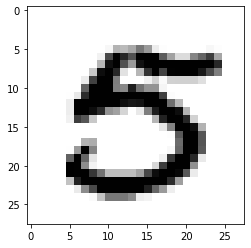

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

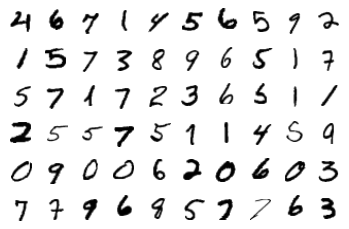

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

In [10]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

In [11]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [12]:
criterion = nn.NLLLoss()

In [14]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [15]:
logps = model(images) #log probabilities
loss = criterion(logps, labels)

In [16]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        ...,
        [ 0.0025,  0.0025,  0.0025,  ...,  0.0025,  0.0025,  0.0025],
        [-0.0053, -0.0053, -0.0053,  ..., -0.0053, -0.0053, -0.0053],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012]])


In [17]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 30
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6485575274713258
Epoch 1 - Training loss: 0.28751552093035376
Epoch 2 - Training loss: 0.2209345106519997
Epoch 3 - Training loss: 0.17368159887752235
Epoch 4 - Training loss: 0.14378611025398474
Epoch 5 - Training loss: 0.1217865143725867
Epoch 6 - Training loss: 0.10477342859887556
Epoch 7 - Training loss: 0.09337173107026546
Epoch 8 - Training loss: 0.08329639776345732
Epoch 9 - Training loss: 0.07472149326777788
Epoch 10 - Training loss: 0.06759424289109618
Epoch 11 - Training loss: 0.06210110797387943
Epoch 12 - Training loss: 0.05713724562608357
Epoch 13 - Training loss: 0.052431965933622184
Epoch 14 - Training loss: 0.04915431685381329
Epoch 15 - Training loss: 0.04486132482923607
Epoch 16 - Training loss: 0.0424634600743286
Epoch 17 - Training loss: 0.03813246592505972
Epoch 18 - Training loss: 0.035837184612838816
Epoch 19 - Training loss: 0.03332249713162564
Epoch 20 - Training loss: 0.03056921109576761
Epoch 21 - Training loss: 0.028814330342104597

In [18]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
        correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 157

Model Accuracy = 0.9617834394904459
